In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# load the dataframe

In [2]:
df = pd.read_csv("/Users/fynn/Uni/DL4NLP/data/Annotationen-Stufe-2.txt", index_col=0)
df.drop(["Seite", "Unnamed: 2",
         "Semantikerweiterung?",
         "Unersetzlich?",
         "Unersetzlich?",
         "sprachlich irregulär?",
         "pointiert?"], axis = 1, inplace = True) # 2x Floskel

df = df[~df.Textstelle.isnull()]
df

df.head()

,Textstelle,Metapher?,Fokus,Rahmen,"Stärkegrad (A, B, C)",Begründung/Kommentar,Annotator
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,das Horoskop stellen,einer Nation,B,Horoskop stellen - bezogen auf Nationen ist da...,B
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN,NaN,Fachausdruck,B
2,"Diese wolle die bittere Auslese, ohne die auc...",Metapher,bittere,Auslese,A,"Unauffällig, aber doch metaphorisch: Dass eine...",B
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",Metapher,ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,A,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B
4,In Californien ist ebenso die früher dort hei...,Metaphernkandidat,NaN,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B


In [3]:
df["Metapher?"].value_counts()

Metaphernkandidat    1785
Metapher              777
Unklar                  3
Grenzfall               1
Name: Metapher?, dtype: int64

In [4]:
df["Metapher"] = (df["Metapher?"] == "Metapher").astype(int)
df["Kandidat"] = (df["Metapher?"] == "Metaphernkandidat").astype(int)
df.drop("Metapher?", axis=1, inplace = True)
df

,Textstelle,Fokus,Rahmen,"Stärkegrad (A, B, C)",Begründung/Kommentar,Annotator,Metapher,Kandidat
0,Bei Beobachtung solchen moralischen Wertes ka...,das Horoskop stellen,einer Nation,B,Horoskop stellen - bezogen auf Nationen ist da...,B,1,0
1,Die Zellen verschmelzen miteinander.,NaN,NaN,NaN,Fachausdruck,B,0,1
2,"Diese wolle die bittere Auslese, ohne die auc...",bittere,Auslese,A,"Unauffällig, aber doch metaphorisch: Dass eine...",B,1,0
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,A,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B,1,0
4,In Californien ist ebenso die früher dort hei...,NaN,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B,0,1
...,...,...,...,...,...,...,...,...
2579,In ähnlicher Weise sollen noch mehrere andere ...,NaN,NaN,NaN,NaN,B,0,1
2580,"Die Amerikaner folgern, da sie alle Rohmateria...",einer turmhohen Mauer,Schutzzöllen,A,NaN,B,1,0
2581,Sie könne bei ihrer jetzigen großen Kraft und ...,mütterlichen Päppelflasche,Sie,B,NaN,B,1,0
2582,"Schwarze Flecken von Habgier, Raubsucht, Unger...",NaN,NaN,NaN,NaN,B,0,1


In [5]:
# example of several occurances
stelle = "Der politische Körper verwendet in beiden Fällen seine meiste Kraft"
stelle +=" auf die Zunahme von Zähnen und Krallen."
clms = ["Textstelle", "Annotator", "Metapher", "Kandidat"]
df.loc[ [stelle in text for text in df["Textstelle"]], clms]

,Textstelle,Annotator,Metapher,Kandidat
378,"""Der politische Körper verwendet in beiden Fä...",B,1,0
958,"""Der politische Körper verwendet in beiden Fä...",K,1,0
1406,"""Der politische Körper verwendet in beiden Fä...",A,0,1


In [6]:
data = df.groupby(["Textstelle"])[["Metapher", "Kandidat"]].sum()
data

,Metapher,Kandidat
Textstelle,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",2,1
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",0,3
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",0,3
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""",1,2
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",0,3
...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",0,3
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",1,2
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",2,1


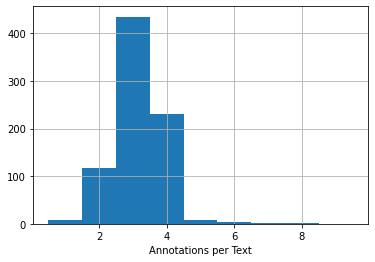

In [7]:
data[["Metapher", "Kandidat"]].sum(axis=1).hist(bins = np.arange(0,10,1)+0.5);
#plt.yscale("log")
plt.xlabel("Annotations per Text");

In [8]:
erklärung = df.groupby(["Textstelle"])[["Fokus", "Rahmen"]].first()
erklärung[erklärung.isnull()] = np.nan
erklärung

,Fokus,Rahmen
Textstelle,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",Zähnen und Krallen,der politische Körper
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",NaN,NaN
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",NaN,NaN
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""","Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",NaN,NaN
...,...,...
"verlaufs; sie hat Naturforschung in dem von uns beschriebenen Sinn sein wollen, so daß ihr alle menschlichen Zweckvorstellungen, Bestrebungen, geistigen Strömungen nur als unroirlsame Begleiterscheinungen, als unwesentliche Zugaben des Geschichtsverlaufs gegolten haben Für den Materialismus im eigentlichen Sinn dürfen Vorstellungen Bewußtseinsorgane überhaupt, nur aufspritzenden Blasen gleichen, die auf die Richtung des ungehindert dahinbransenden Stroms keinen Einfluß auszuüben vermögen.",NaN,NaN
"wenn wir uns ein Prinzip denken und auf Grund dessen staatliche Menschenverhältnisse entwickeln, so müssen wir auf alle Fälle, wenn die so bestimmten Verhältnisse nicht nach dem Willen des »Gesetzgebers« verstellbare Puppen oder Einwohner der Insel Utopia (= Nirgendsort) betreffen sollen, erst uns klar werden, wie es sich mit der Notwendigkeit der Verhältnisse verhält.",verstellbare Puppen,staatliche Menschenverhältnisse
"wenn wir von dem schlechten Worte »Rechtsphilofophie« absehen, so vergißt man bei jener Annahme, einmal daß eine Philosophie, welche die Prinzipien erst aufstellt und dann erprobt. schwindsüchtig ist und zweitens daß eine »Rechtsphilosophie« nicht Ergründung von Prinzipien, sondern höchstens nur Verwendung derselben für ein allgemeines Weltbild (: Philosophie) ist.",schwindsüchtig ist,daß eine Philosophie


In [9]:
data = data.merge(erklärung, on = "Textstelle")
data.reset_index(inplace = True)
data

,Textstelle,Metapher,Kandidat,Fokus,Rahmen
0,"""Der politische Körper verwendet in beiden Fä...",2,1,Zähnen und Krallen,der politische Körper
1,"""Immer noch wird durch die protestantische Le...",0,3,NaN,NaN
2,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",0,3,NaN,NaN
3,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal
4,"""Solange das Menschengeschlecht seinen Zerstö...",0,3,NaN,NaN
...,...,...,...,...,...
801,verlaufs; sie hat Naturforschung in dem von un...,0,3,NaN,NaN
802,wenn wir uns ein Prinzip denken und auf Grund ...,1,2,verstellbare Puppen,staatliche Menschenverhältnisse
803,wenn wir von dem schlechten Worte »Rechtsphilo...,2,1,schwindsüchtig ist,daß eine Philosophie
804,"»Die Macht, die das Kabinett hat, auf die vers...",0,2,NaN,NaN


## Compare dataframe to Gold Standard

In [10]:
gold = pd.read_csv("/Users/fynn/Uni/DL4NLP/data/Annotationen-Stufe-2-GoldStandard.csv", index_col = 0)
gold.drop(["Annotator", "Filename"], axis=1, inplace=True)
gold

,Textstelle,Metapher?,Fokus,Rahmen
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,NaN,NaN
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN
2,das 19. Jahrhundert schließt in dieser Hinsic...,Metapher,NaN,NaN
3,Das Gefühl ist ein Zeuge des jeweilig obwalte...,Metaphernkandidat,NaN,NaN
4,"Der erste Fall bricht die Schutzwehr nieder, ...",Metaphernkandidat,NaN,NaN
...,...,...,...,...
653,In ähnlicher Weise sollen noch mehrere andere ...,Metaphernkandidat,NaN,NaN
654,"Die Amerikaner folgern, da sie alle Rohmateria...",Metapher,"['einer turmhohen Mauer', 'turmhohen Mauer']","['Schutzzöllen', 'von Schutzzöllen']"
655,Sie könne bei ihrer jetzigen großen Kraft und ...,Metaphernkandidat,NaN,NaN
656,"Schwarze Flecken von Habgier, Raubsucht, Unger...",Metaphernkandidat,NaN,NaN


In [11]:
# Only 81% of Annotated data is also in the Gold Standard
np.isin(data.Textstelle, gold.Textstelle).mean().round(3)

0.814

In [12]:
# But all Gold Labels are also in the 
np.isin(gold.Textstelle, data.Textstelle).mean()

1.0

In [13]:
def eliminate_substring(text, k=22):
    for ii in range(len(text)):
        remaining_text = text[ii:]
        
        jj = k
        while remaining_text[:jj] in remaining_text[jj:]:

            jj+=1
        if jj > k:
            #print(jj)
            return text[:ii] + remaining_text[jj-1:]
    # if we find no substring, just give the text back
    return text

277.5790273556231


/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_30163/1062702004.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_30163/1062702004.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_30163/1062702004.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_30163/1062702004.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\d\.', '')
/var/folders/j4/qmf6qmvd1gv0nct

254.25075987841944


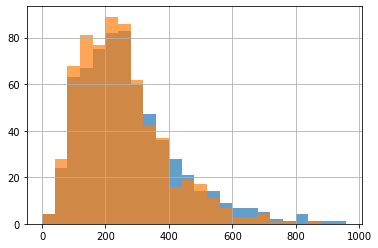

In [14]:
bins = np.arange(0, 1000, 40)

#data = df.copy()
data = gold

data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

#remove quotes
data["Textstelle"] = data.Textstelle.str.replace('"', '')
data["Textstelle"] = data.Textstelle.str.replace("'", '')
data["Textstelle"] = data.Textstelle.str.replace(r'»', '')
data["Textstelle"] = data.Textstelle.str.replace(r'«', '')
data["Textstelle"] = data.Textstelle.str.replace(r'„', '')
data["Textstelle"] = data.Textstelle.str.replace(r'“', '')

# remove leading/trailing whitespace
data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")

#remove digits
data["Textstelle"] = data.Textstelle.str.replace(r'\d\.', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')

# remove brackets:
data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\(', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\)', '')

# remove special characters
# YES, we remove dots. But they need to be added again at the end
#data["Textstelle"] = data.Textstelle.str.replace(r'.', '')
data["Textstelle"] = data.Textstelle.str.replace(r':', '')
data["Textstelle"] = data.Textstelle.str.replace(r';', '')
data["Textstelle"] = data.Textstelle.str.replace(r'— ', '')
data["Textstelle"] = data.Textstelle.str.replace(r'—', '')
data["Textstelle"] = data.Textstelle.str.replace(r'- ', '') # linebreak extension
data["Textstelle"] = data.Textstelle.str.replace(r'-', '')
data["Textstelle"] = data.Textstelle.str.replace(r'_', '')

# make sure Commas come after a word:
data["Textstelle"] = data.Textstelle.str.replace(r' ,', ',')

# Roman numerals
data["Textstelle"] = data.Textstelle.str.replace(r'^I{0,3}V{0,1}I{0,3} ', "")
data["Textstelle"] = data.Textstelle.str.replace(r'^I{0,1}X{1,2}I{0,3} ', "")





data["Kürzungen"] = 0
for i in range(6):
    new_data = data["Textstelle"].apply(eliminate_substring)
    data["Kürzungen"] += (data["Textstelle"] != new_data)
    data["Textstelle"] = new_data

data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

In [15]:
data["Kürzungen"]

0      1
1      0
2      0
3      1
4      0
      ..
653    0
654    0
655    0
656    0
657    0
Name: Kürzungen, Length: 658, dtype: int64

In [16]:
data

,Textstelle,Metapher?,Fokus,Rahmen,Kürzungen
0,Bei Beobach tung solchen moralischen Wertes ka...,Metapher,NaN,NaN,1
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN,0
2,das Jahrhundert schließt in dieser Hinsicht m...,Metapher,NaN,NaN,0
3,Das Gefühl ist ein Zeuge des jeweilig obwalten...,Metaphernkandidat,NaN,NaN,1
4,"Der erste Fall bricht die Schutzwehr nieder, d...",Metaphernkandidat,NaN,NaN,0
...,...,...,...,...,...
653,In ähnlicher Weise sollen noch mehrere andere ...,Metaphernkandidat,NaN,NaN,0
654,"Die Amerikaner folgern, da sie alle Rohmateria...",Metapher,"['einer turmhohen Mauer', 'turmhohen Mauer']","['Schutzzöllen', 'von Schutzzöllen']",0
655,Sie könne bei ihrer jetzigen großen Kraft und ...,Metaphernkandidat,NaN,NaN,0
656,"Schwarze Flecken von Habgier, Raubsucht, Unger...",Metaphernkandidat,NaN,NaN,0


# Performing a chi-square test of independence

In [27]:
tab = pd.crosstab(data["Metapher?"], data["Kürzungen"])
tab

Kürzungen,0,1,2,3,4
Metapher?,,,,,
Metapher,95,23,9,2,0
Metaphernkandidat,412,88,21,5,3


In [28]:
from scipy.stats import chi2_contingency

res = chi2_contingency(tab.to_numpy())
res

(3.4750164558497687,
 0.48168730168534923,
 4,
 array([[ 99.39665653,  21.76139818,   5.88145897,   1.37234043,
           0.5881459 ],
        [407.60334347,  89.23860182,  24.11854103,   5.62765957,
           2.4118541 ]]))

In [29]:
tab = pd.crosstab(data["Metapher?"], data["Kürzungen"] > 0)
tab

Kürzungen,False,True
Metapher?,,
Metapher,95,34
Metaphernkandidat,412,117


In [30]:
res = chi2_contingency(tab.to_numpy())
res

(0.8280024967361151,
 0.36285076454002785,
 1,
 array([[ 99.39665653,  29.60334347],
        [407.60334347, 121.39665653]]))